# 1.0 Import Libraries and Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.patheffects as pe


In [ ]:
link = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

data = pd.read_csv(link)
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


# 2.0 Pre-processing and Cleaning

In [ ]:
data_br = data.loc[data.country_region == "Brazil",:].iloc[:,[1,2,3,7,8,9,10,11,12,13]].copy()
data_br.columns = ["country","state","city","date","retail","grocery","parks","transit","workplaces","residential"]
data_br.date = pd.to_datetime(data_br.date)
data_br.index = data_br.date
data_br.state = data_br.state.str.replace("State of ","")
data_br.drop(labels="date",axis=1,inplace=True) 
data_br

,country,state,city,retail,grocery,parks,transit,workplaces,residential
date,,,,,,,,,
2020-02-15,Brazil,NaN,NaN,5.0,4.0,-5.0,8.0,6.0,0.0
2020-02-16,Brazil,NaN,NaN,2.0,3.0,-13.0,3.0,0.0,1.0
2020-02-17,Brazil,NaN,NaN,-2.0,0.0,-12.0,9.0,19.0,-1.0
2020-02-18,Brazil,NaN,NaN,-3.0,-1.0,-11.0,9.0,15.0,-1.0
2020-02-19,Brazil,NaN,NaN,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...
2020-09-21,Brazil,Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-2.0,NaN
2020-09-22,Brazil,Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-8.0,NaN
2020-09-23,Brazil,Tocantins,Tocantinópolis,NaN,NaN,NaN,NaN,-6.0,NaN


# 3.0 Creation of new areas

In [ ]:
item = "retail" #grocery, parks, transit, workplaces, residential

data_brasil = data_br.loc[data_br.state.isnull() & data_br.city.isnull()].copy()

data_br_state = data_br.loc[~data_br.state.isnull() & data_br.city.isnull()].copy()

data_br_amazonia = data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()[item][["Amazonas","Acre", "Roraima", 
                                                                                                       "Rondônia", "Amapá", "Pará", 
                                                                                                       "Mato Grosso","Tocantins"]].copy()

data_br_nordeste = data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()[item][["Maranhão","Ceará", 
                                                                                                       "Rio Grande do Norte", "Paraíba", 
                                                                                                       "Pernambuco", "Piauí", "Bahia",
                                                                                                       "Sergipe","Alagoas"]].copy()

data_br_centrosul = data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()[item][["Goiás", "Mato Grosso do Sul",
                                                                                                        "Minas Gerais", "Espírito Santo",
                                                                                                        "Federal District", "Rio de Janeiro", 
                                                                                                        "São Paulo","Paraná","Santa Catarina",
                                                                                                        "Rio Grande do Sul"]].copy()

In [ ]:
df_geral = data_br_nordeste.copy()

#df_geral["brasil"] = data_brasil[item]
df_geral["mean_amazonia"]= data_br_amazonia.mean(axis=1)
df_geral["mean_centrosul"] = data_br_centrosul.mean(axis=1)
df_geral["mean_nordeste"]= data_br_nordeste.mean(axis=1)
df_geral["manaus"] = data_br.loc[data_br.city == "Manaus"][item]
df_geral["saopaulo"] = data_br.loc[data_br.city == "São Paulo"][item]
df_geral["recife"] = data_br.loc[data_br.city == "Recife"][item]

df_geral.drop(labels=["Maranhão", "Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Piauí","Bahia","Sergipe","Alagoas"],axis=1, inplace=True)

df_geral = df_geral.dropna()

In [ ]:
df_geral

state,mean_amazonia,mean_centrosul,mean_nordeste,manaus,saopaulo,recife
date,,,,,,
2020-02-15,5.250,4.8,1.333333,7.0,13.0,10.0
2020-02-16,2.625,0.0,-2.777778,4.0,7.0,8.0
2020-02-17,-2.500,-2.3,-4.333333,-5.0,-1.0,0.0
2020-02-18,-2.500,-2.3,-3.111111,-2.0,-1.0,1.0
2020-02-19,-4.250,-1.8,-3.222222,-7.0,-2.0,5.0
...,...,...,...,...,...,...
2020-08-12,-13.125,-27.2,-25.444444,-7.0,-37.0,-31.0
2020-08-13,-11.750,-26.3,-25.777778,-4.0,-36.0,-34.0
2020-08-14,-11.875,-24.7,-25.111111,3.0,-36.0,-29.0


# 4.0 A first figure

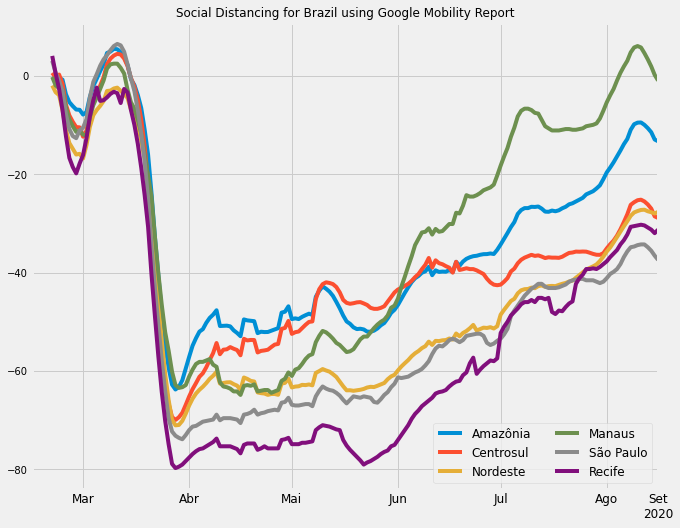

In [ ]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

# Plotar os dados com uma média movel de 7 dias
df_geral.rolling(window=7).mean().plot(ax=ax)

handles, labels = ax.get_legend_handles_labels()
labels[0] = 'Amazônia'
labels[1] = 'Centrosul'
labels[2] = 'Nordeste'
labels[3] = 'Manaus'
labels[4] = 'São Paulo'
labels[5] = 'Recife'
ax.legend(handles,labels,ncol=2,fontsize=12)

ax.set_xticklabels(["","Mar","Abr","Mai","Jun","Jul","Ago", "Set\n2020"],fontsize=12)
ax.set_xlabel("")
ax.yaxis.set_tick_params(labelsize=10)

ax.set_title("Social Distancing for Brazil using Google Mobility Report", fontsize=12)

plt.show()


# 5.0 All in one


In [ ]:
 df_media_movel = df_geral.copy()
 df_media_movel = df_media_movel.rolling(window=7).mean()

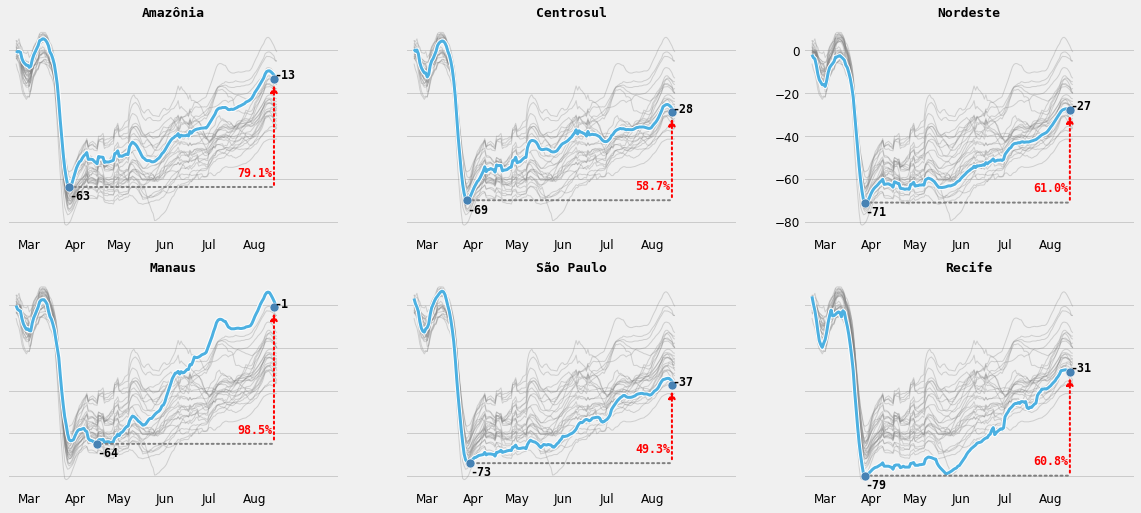

In [ ]:
#Criação de figura e axes
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(18,8))

item = "retail" #grocery, parks, transit, workplaces, residential

#Colunas do df
regioes = ["mean_amazonia", "mean_centrosul", "mean_nordeste", "manaus", "saopaulo", "recife"]

labels = ["Amazônia", "Centrosul", "Nordeste", "Manaus", "São Paulo", "Recife"]

l = 0
c = 0
for i,regiao in enumerate(regioes):

  #Esse aqui é o das linhas cinzas, que olha pra todos os estados
  data_br_state.groupby(by=[data_br_state.index,"state"]).mean().unstack()[item].rolling(window=7).mean().plot(legend=False,color="grey",linewidth=1, alpha=0.3, ax=ax[l,c])

  #Plota com a média móvel de 7 dias
  df_media_movel[regiao].plot(legend=False,linewidth=3, alpha=0.7, path_effects=[pe.Stroke(linewidth=5, foreground='white'), pe.Normal()],ax=ax[l,c])

  ax[l,c].set_title(labels[i],fontsize=13,fontfamily= 'monospace', fontweight="bold")
  ax[l,c].xaxis.grid(False)
  ax[l,c].set_xlabel("")
  
  ax[l,c].set_xticklabels(["","Mar","Apr","May","Jun","Jul","Aug"])
  ax[l,c].xaxis.set_tick_params(labelsize=12)
  ax[l,c].yaxis.set_tick_params(labelsize=12)
  
  #Data collected for the arrows creation 
  
  # y that represents the smallest retail value
  y_inicial = df_media_movel[regiao].min()
  
  # y that represents the retail value in the last occurence
  y_final = df_media_movel[regiao].tail(1)[0]

  # x that represents the value of one of the last occurences
  # (the last wasn't used because it made the arrow disappear from the graphic)
  x_final = df_media_movel.iloc[-3:-2].index[0]

  # x that represents the date of the smallest retail value
  x_inicial = df_media_movel[regiao].idxmin()

  # distance between the initial y (y_inicial) and its value on the last day
  # (we used +8 to make the arrow point right in the line, otherwise it would overlap)
  y_variation = y_inicial + y_final*(-1) + 30
  
  #days between the last day of the graphic and the smallest value's day (used only for arrow purposes)
  days_variation = x_final - x_inicial 

  x_variation_all = x_inicial + days_variation 

  #this percentage shows how much the retail increased from the smallest value to the last value
  percentage = round(((y_inicial-y_final)*100)/y_inicial,1)

  #this variable is used to position the "percentage" value
  x_final_percentage_position = df_media_movel.iloc[-28:-27].index[0]


  #The following .annotate() functions are printing the arrows, values and circles.
  ax[l,c].annotate("", xy=(x_final, y_inicial), xytext=(x_final, y_final-2), 
                   arrowprops={"arrowstyle" : "<|-", "linestyle" : ":","color": "red", "linewidth" : 2})
  ax[l,c].annotate("", xy=(x_inicial, y_inicial), xytext=(x_variation_all, y_inicial), 
                   arrowprops={"arrowstyle" : "-", "linestyle" : ":","color": "gray", "linewidth" : 2})

  ax[l,c].annotate(str(percentage)+"%", xy=(x_final_percentage_position, y_inicial+5),fontsize="small", fontfamily= 'monospace', color="red", fontweight="extra bold")

  ax[l,c].scatter(x_inicial, y_inicial,color="#4682B4",edgecolor="white", s=80, alpha=1, zorder=10)
  ax[l,c].scatter(x_final, y_final, color="#4682B4",edgecolor="white", s=80, alpha=1, zorder=10)


  ax[l,c].annotate(int(y_inicial), xy=(x_inicial,y_inicial-6), 
                   fontfamily= 'monospace', color="black", fontweight="bold",fontsize="small", zorder=11)
  
  ax[l,c].annotate(int(y_final), xy=(x_final, y_final),
                   fontfamily= 'monospace', color="black", fontweight="bold",fontsize="small", zorder=11)
  if (i==2):
    c = -1
    l = 1
  
  ax[l,c].set_yticklabels([])
  
  c += 1
  

plt.show()
  